# Dog Vision Project (Neural Network Project)
### 🐶 Using Transfer Learning and TensorFlow 2.0 to Classify Different Dog Breeds

Who's that doggy in the window?

Dogs are incredible. But have you ever been sitting at a cafe, seen a dog and not known what breed it is? I have. And then someone says, "it's an English Terrier" and you think, how did they know that?

In this project we're going to be using machine learning to help us identify different breeds of dogs.

To do this, we'll be using data from the [Kaggle dog breed identification competition](https://www.kaggle.com/c/dog-breed-identification/overview). It consists of a collection of 10,000+ labelled images of 120 different dog breeds.

This kind of problem is called multi-class image classification. It's multi-class because we're trying to classify mutliple different breeds of dog. If we were only trying to classify dogs versus cats, it would be called binary classification (one thing versus another).

### Importing modules that we gonna use in this Dog Vision project.

In [1]:
#importing modules
%matplotlib inline
#to use tensorflow version 2.0
%tensorflow_version 2.x
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

### Importing Labels
First we are gonna import the '**labels.csv**' file from our Data folder.

It contains two columns
1. `id` (images ids that are in the train folder)
2. `breed`

In [2]:
labels = pd.read_csv('/content/drive/My Drive/DogVision/Data/labels.csv')
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

### First lets display the image to analyze our workflow

ohhhh thats cute one!!

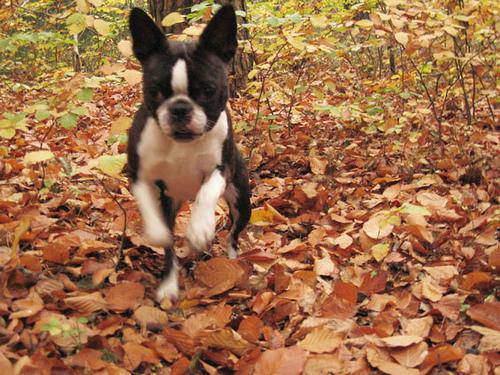

In [3]:
#viewing image
from IPython.display import display, Image
Image('/content/drive/My Drive/DogVision/Data/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

### Accessing the Data
Since we've got the image ID's and their labels in a DataFrame (labels_csv), we'll use it to create:

* A list a filepaths to training images
* An array of all labels
* An array of all unique labels

We'll only create a list of filepaths to images rather than importing them all to begin with. This is because working with filepaths (strings) is much efficient than working with images.

As our images is in the train folder.
Hmmm, by looking at our images names they are very similar to and `id` column in our **labels.csv**.

That's so good because we can use list comprehension to make the paths of our training images.

**train path ('/content/drive/My Drive/DogVision/Data/train/')**

In [4]:
# Create pathnames from image ID's
filepaths = ['/content/drive/My Drive/DogVision/Data/train/' + names + '.jpg' for names in labels['id']]
# Check the first 10 filenames
filepaths[:10]

['/content/drive/My Drive/DogVision/Data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/DogVision/Data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/DogVision/Data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/DogVision/Data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/DogVision/Data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/DogVision/Data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/DogVision/Data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/DogVision/Data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/DogVision/Data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/DogVision/Data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

Lets check the length of our **labels.csv** and our filepaths are equal or not

In [5]:
len(labels), len(filepaths)

(10222, 10222)

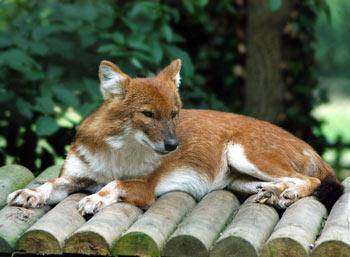

In [6]:
# Check an image directly from a filepaths to check its working or not!
Image(filepaths[42])

ohhh thats look like a fox!!!

Now we've got our image filepaths together, let's get the labels.

We'll take them from labels_csv and turn them into a NumPy array.

In [7]:
# Find the unique label values
breeds = labels['breed'].to_numpy()
breeds[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

Since a machine learning model can't take strings as input (what breeds currently is), we'll have to convert our breeds to numbers.

To begin with, we'll find all of the unique dog breed names.

Then we'll go through the list of breeds and compare them to unique breeds and create a list of booleans indicating which one is the real breed (True) and which ones aren't (False).

In [8]:
unique_breeds = np.unique(breeds)
len(unique_breeds)

120

So, we got 120 unique number of breeds. Lets look at them.

In [9]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

Now use unique_breeds to help turn our labels array into an array of booleans.

In [10]:
# Example: Turn one breed into an array of booleans
breeds[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

That's for one example, let's do the whole thing.

In [11]:
boolean_breeds = [breed == unique_breeds for breed in breeds]
boolean_breeds[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

### Creating our own validation set

Since the dataset from Kaggle doesn't come with a validation set (a split of the data we can test our model on before making final predicitons on the test set), let's make one.

We could use Scikit-Learn's `train_test_split` function or we could simply make manual splits of the data.

For accessibility later, let's save our filepaths variable to X (data) and our boolean_breeds to y.

In [12]:
X = filepaths
y = boolean_breeds

As we have a huge collection of data so its a good practice to work on the the small number of data to save our time then when our code is ready we will test on large data

In [13]:
NUM_IMAGES = 1000 #@param{type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

We can custom split our data, but why not use the ready built-in function of scikit-learn `train_test_split` as by the fundamental rule of programming that **Don't repeat yourself (DRY)**

Now let's split our data into training and validation sets. We'll use and 80/20 split (80% training data, 20% validation data).

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2, random_state=42)

In [15]:
len(X_train),len(X_val), len(y_train),len(y_val)

(800, 200, 800, 200)

In [16]:
# Check out the training data (image file paths and labels)
X_train[:2], y_train[:2]

(['/content/drive/My Drive/DogVision/Data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/My Drive/DogVision/Data/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, Fal

### Preprocessing Images or Turning images into Tensors

Our breeds are in numeric format but our images are still just file paths.

Since we're using TensorFlow, our data has to be in the form of Tensors.

A Tensor is a way to represent information in numbers. If you're familar with NumPy arrays (you should be), a Tensor can be thought of as a combination of NumPy arrays, except with the special ability to be used on a GPU.

To preprocess our images into Tensors we're going to write a function which does a few things:

  1. Takes an image filename as input.
  2. Uses TensorFlow to read the file and save it to a variable, image.
  3. Turn our image (a jpeg file) into Tensors.
  4. Resize the image to be of shape (224, 224, 3).
  5. Return the modified `image`.

You might be wondring that'what is (224, 224, 3)?' so the answer is (height, width, color channels(RGB))

Now, you have an little bit understanding if not bear with me you can understand when we code futher.


Now there are couple of ways to turn images into tensors.
### Method 1 (Not Recommended)

In [17]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filepaths[25]) #reading an image
image

array([[[158,  67,  84],
        [126,  50,  63],
        [121,  68,  74],
        ...,
        [220, 237, 245],
        [221, 238, 246],
        [222, 239, 247]],

       [[154,  63,  80],
        [134,  56,  70],
        [126,  71,  77],
        ...,
        [225, 242, 250],
        [226, 243, 251],
        [227, 244, 252]],

       [[156,  62,  80],
        [148,  68,  81],
        [133,  76,  83],
        ...,
        [225, 244, 251],
        [227, 246, 253],
        [229, 248, 255]],

       ...,

       [[ 36,  26,  17],
        [ 47,  37,  28],
        [ 58,  45,  36],
        ...,
        [211, 206, 203],
        [212, 207, 204],
        [212, 207, 204]],

       [[ 34,  23,  17],
        [ 47,  36,  30],
        [ 60,  47,  41],
        ...,
        [211, 206, 203],
        [214, 209, 206],
        [214, 209, 206]],

       [[ 49,  38,  34],
        [ 54,  43,  39],
        [ 56,  42,  39],
        ...,
        [210, 205, 202],
        [214, 209, 206],
        [215, 210, 207]]

In [18]:
image.shape

(375, 500, 3)

By using the tensorflow `constant()` function you can convert any `object` into tensors.

In [19]:
tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[158,  67,  84],
        [126,  50,  63],
        [121,  68,  74],
        ...,
        [220, 237, 245],
        [221, 238, 246],
        [222, 239, 247]],

       [[154,  63,  80],
        [134,  56,  70],
        [126,  71,  77],
        ...,
        [225, 242, 250],
        [226, 243, 251],
        [227, 244, 252]],

       [[156,  62,  80],
        [148,  68,  81],
        [133,  76,  83],
        ...,
        [225, 244, 251],
        [227, 246, 253],
        [229, 248, 255]],

       ...,

       [[ 36,  26,  17],
        [ 47,  37,  28],
        [ 58,  45,  36],
        ...,
        [211, 206, 203],
        [212, 207, 204],
        [212, 207, 204]],

       [[ 34,  23,  17],
        [ 47,  36,  30],
        [ 60,  47,  41],
        ...,
        [211, 206, 203],
        [214, 209, 206],
        [214, 209, 206]],

       [[ 49,  38,  34],
        [ 54,  43,  39],
        [ 56,  42,  39],
        ...,
        [210, 205, 20

### Method 2 (Recommended by Tensorflow documentation)

In [20]:
# Function that read an image and turn it into tensors
def process_image(file_paths):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Reading an image from filepaths
  image = tf.io.read_file(file_paths)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[224,224])

  return image

### Creating data batches

Wonderful. Now we've got a function to convert our images into Tensors, we'll now build one to turn our data into batches (more specifically, a TensorFlow [`BatchDataset`](https://www.tensorflow.org/guide/data#batching_dataset_elements)).

What's a batch?

A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.

TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of of `process_image` function at the same time.

In [21]:
# Create a simple function to return a tuple (image, label)
def get_image_breed(file_paths, breed):
  """
  Takes an image file path name and the associated breed,
  processes the image and returns a tuple of (image, breed).
  """
  image = process_image(file_paths)
  return image , breed

In [22]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32
# Create a function to turn data into batches
def create_data_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Creates batches of data out of image (x) and breed (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) #filepaths
    
    # Map our data with process image function
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating valid data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), #filepaths
                                               tf.constant(y))) #breeds
    # Map our data with get_image_breed function to get both image and breed
    data_batch = data.map(get_image_breed).batch(batch_size)
    return data_batch

  # If the data is a training dataset, we shuffle it
  else:
    print("Creating train data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), #filepaths
                                               tf.constant(y))) #breeds
    # shuffling the data to perform well
    data = data.shuffle(buffer_size=len(x))
    
    # Map our data with get_image_breed function to get both image and breed
    data_batch = data.map(get_image_breed).batch(batch_size)
    return data_batch

In [23]:
# Create training and validation data batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val, valid_data=True)

Creating train data batches...
Creating valid data batches...


In [24]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing data batches

In [25]:
# getting the breed by using boolean_breeds list with argmax() function
unique_breeds[boolean_breeds[1].argmax()]

'dingo'

In [26]:
# Create a function for viewing images in a data batch
def show_25_images(image, breed):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure size
  plt.figure(figsize=(15, 15))
  
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(image[i])
    # Add the image label as the title
    plt.title(unique_breeds[boolean_breeds[i].argmax()])
    # Turn gird lines off
    plt.axis('off')


To make computation efficient, a batch is a tighly wound collection of Tensors.

So to view data in a batch, we've got to unwind it.

We can do so by calling the `as_numpy_iterator()` method on a data batch.

This will turn our a data batch into something which can be iterated over.

Passing an iterable to `next()` will return the next item in the iterator.

In our case, next will return a batch of 32 images and breeds pairs.

Note: Running the cell below and loading images may take a little while.

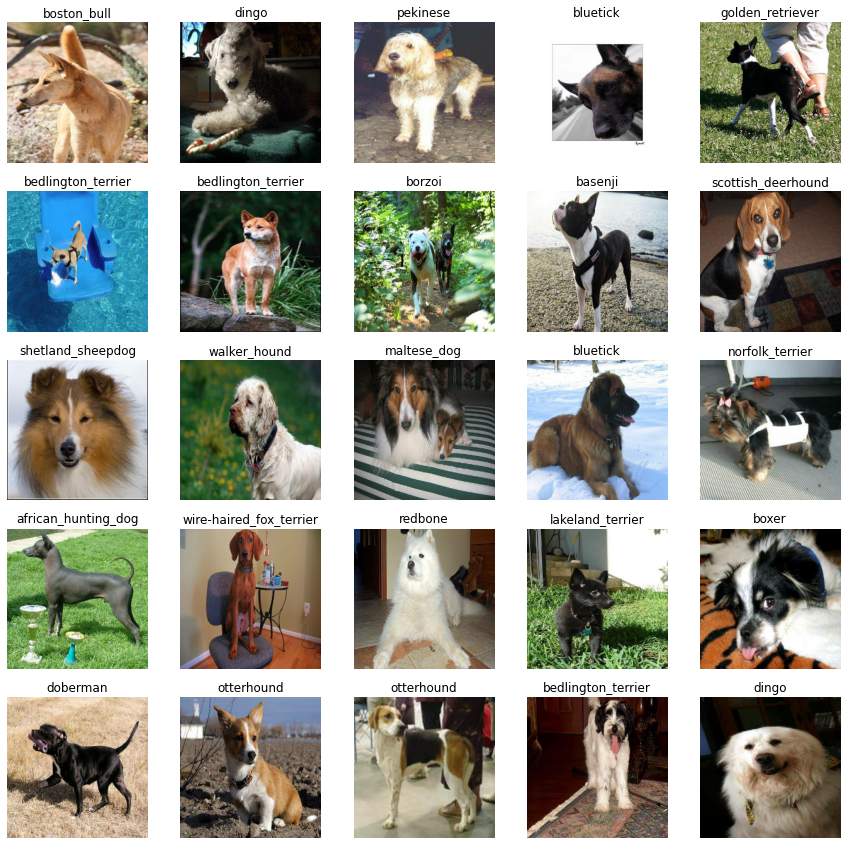

In [27]:
# Visualize training images from the training data batch
train_images, train_breeds = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_breeds)

## Creating and Training Model

We can choose the model from Tensorflow Hub according to our need. For our multi-class classification problem we are choosing the [mobilenet_v2_130_224](https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4) model, tells us this model takes an input of images in the shape 224, 224. It also says the model has been trained in the domain of image classification.

In [28]:
# Setup input shape to the model
IMG_SIZE=224
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique breeds

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we got our Input, Ouput shape and the model url. We can start to put them together.

There are many ways to build a model but we will use the Tensorflow keras api because it is the best way to build a model.

Defining a deep learning model in Keras can be as straightforward as saying, "here are the layers of the model, the input shape and the output shape, let's go!"

Workflow of building `create_model()` with keras api:
  * Take the input shape, output shape and model url as Parameter.
  * Create the layers of the neural network in a sequential order (Do this, then this and then this...).
  * Compile the model (How it should be evaluated and improved).
  * Build the model (Tell our model that how the input shape that it will take)
  * Return the model

In [29]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  # Setup the model layers in sequential order
  model = tf.keras.Sequential([
                               hub.KerasLayer(model_url), # Layer 1 (Input Layer)
                               tf.keras.layers.Dense(output_shape,
                                                     activation='softmax') # Layer 2 (Output Layer)
  ])
  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer = tf.keras.optimizers.Adam(), # The algorithm that helps our model to improve its guesses
      metrics=['accuracy'] # We want to accuracy metrics higher as much we can
  )
  # Build a model
  model.build(input_shape)  # Tell the model how is the input shape will be that it will take

  return model

### Callbacks

Tensorflow provide us to use the callbacks. Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

We are gonna use Early Stopping Callback which help us to stop the training early if its stop improving to save us some time.

In [30]:
# Using the keras api to create EarlyStopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', # use accuracy metrics to keep eye on the improvement of our model
                                                  patience=3) # stops after 3 rounds of no improvements

Wooohhhh!!! all done, Our training data is ready, our model is ready and last but not least our callback is also ready.

Tensorflow `fit()` function provide the facility to train the model and also validate it.


You might be wondring that what the hell EPOCH is?

So its very simple, it is that how many time the model passes through our train data to train our model and improve its accuracy score.

So, the next queation people probably ask that 'Which is the best value for EPOCH is?' 

So, the answer is the no number is perfect that's why we are using Early Stopping to stop training if our model stop improving.

Let's Create function `train_model()`:

  * First create a model
  * Fit the model by passing it the train data, epochs, callbacks and validation data
  * Return the trail model

In [31]:
# How many number of times our model pass through our data
NUM_EPOCHS = 100
# Create a function that train our model
def train_model():
  model = create_model() # Creating a model

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            callbacks=[early_stopping], # To stop the model early
            validation_data=val_data,  # To validate the model how much it learn
            validation_freq=1) # check validation metrics after every epoch
  return model

Let's call our function.

In [32]:
# model = train_model()

The above cell might take a long time as I am working in the Google Colab so it very irritating that I will execute the above cell again and again when I Start working to I save the model after training it and load it when I need it.

Let's create a Save and Load model functions.

In [33]:
import os
import datetime
# create a function that will save our model
def save_model(model, suffix=None):
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/DogVision/Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s")) # Format of Date and Time

  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  # saving a model
  model.save(model_path)
  return model_path

In [34]:
# create a function that will load our model
def load_model(model_path):
  print(f"Loading saved model from: {model_path}")
  # Load a model require to specify the custom layer of Keras that we apply when creating a model
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer}) # Load a model with Keras Layers
  return model

Saving our model.

In [35]:
# save_model(model, suffix='1000-images-Adam')

Loading our model.

In [36]:
# Load our model trained on 1000 images
model = load_model('drive/My Drive/DogVision/Data/models/20200713-11501594641056-1000-images-Adam.h5')

Loading saved model from: drive/My Drive/DogVision/Data/models/20200713-11501594641056-1000-images-Adam.h5


### Making and evaluating predictions using a trained model

Before we scale up and train on more data, let's see some other ways we can evaluate our model. Because although accuracy is a pretty good indicator of how our model is doing, it would be even better if we could could see it in action.

Making predictions with a trained model is as calling `predict()` on it and passing it data in the same format the model was trained on.

In [37]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data)

In [38]:
predictions

array([[1.7925635e-03, 6.9586931e-05, 6.7456241e-04, ..., 8.8153327e-05,
        2.5095631e-05, 9.8183157e-04],
       [1.1903925e-03, 5.4143154e-04, 1.3577740e-02, ..., 2.4853059e-04,
        6.8234937e-04, 8.0505743e-05],
       [1.4594664e-06, 3.5857945e-05, 3.0576782e-06, ..., 2.5351846e-06,
        1.6325090e-06, 1.3382431e-05],
       ...,
       [5.5531450e-07, 1.8265630e-06, 2.0999474e-05, ..., 9.3361933e-07,
        3.8145597e-06, 3.6278856e-05],
       [1.2907201e-02, 5.9308913e-05, 1.0714235e-05, ..., 2.4821771e-05,
        8.8676563e-05, 2.1195054e-02],
       [4.6634008e-04, 6.7334666e-05, 2.8014780e-04, ..., 5.9306636e-03,
        1.6377766e-03, 5.6445635e-05]], dtype=float32)

In [39]:
# Check the shape of predictions
predictions.shape

(200, 120)

### Turn prediction probabilities into their respective breed (easier to understand)

In [40]:
# Turn prediction probabilities into their respective breed (easier to understand)
def get_predicted_breed(predictions):
  return unique_breeds[np.argmax(predictions)]

In [41]:
# Get a predicted breed based on an array of prediction probabilities
pred_breed = get_predicted_breed(predictions[0])
pred_breed

'cairn'

Unbatch the Validation Images and Breeds

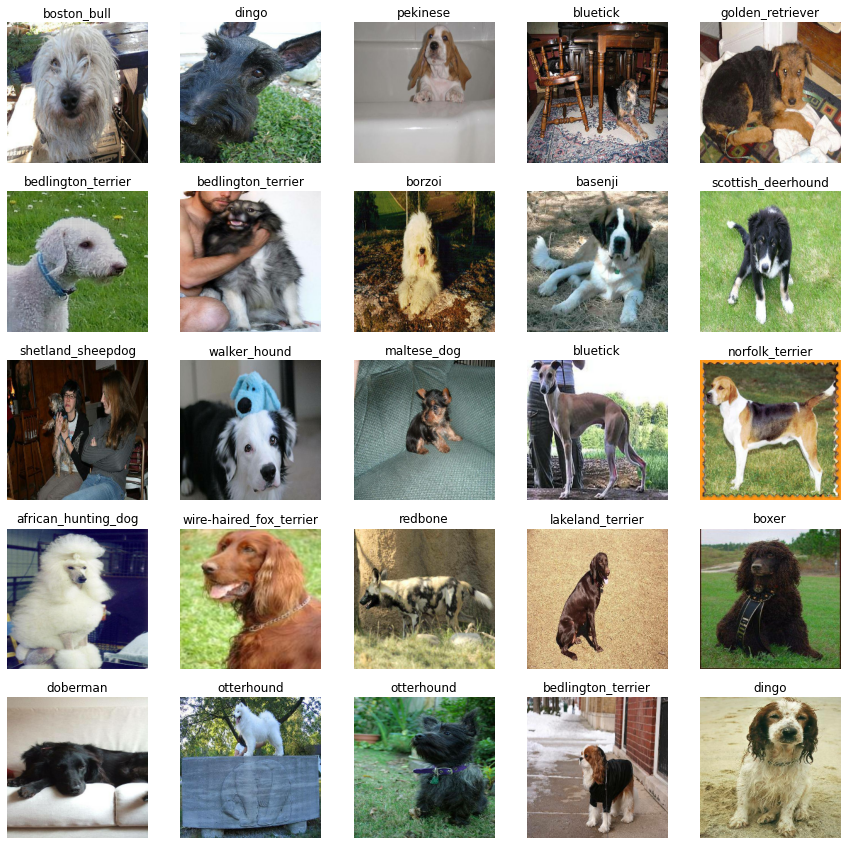

In [42]:
# Unbatch the validation data
val_images,val_breeds = next(val_data.as_numpy_iterator())
# Checking its working or not by displaying Images and their crossponding Breeds 
show_25_images(val_images,val_breeds)

In [43]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  breeds = []
  # Loop through unbatched data
  for image, breed in data.unbatch().as_numpy_iterator():
    images.append(image)
    breeds.append(unique_breeds[np.argmax(breed)])
  return images, breeds

In [44]:
# Unbatchify the validation data
val_images, val_breeds = unbatchify(val_data)

In [45]:
val_images[0], val_breeds[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Nailed it!

Now we've got ways to get:
* Prediction breeds
* Validation breeds (truth breeds)
* Validation images

Let's make some functions to make these all a bit more visualize.

More specifically, we want to be able to view an image, its predicted breed and its actual breed (true breed).

The first function we'll create will:
* Take an array of prediction probabilities, an array of truth breeds, an array of images and an integer.
* Convert the prediction probabilities to a predicted breed.
* Plot the predicted breed, its predicted probability, the truth breed and target image on a single plot.

In [46]:
def plot_pred(predictions, images,breeds,n=1):
  """
  View the prediction, ground truth breed and image for sample n.
  """
  pred_prob, image, true_breed = predictions[n], images[n],breeds[n]
  # Get the pred breed
  pred_breed = get_predicted_breed(pred_prob)
  # Show an Image
  plt.imshow(image)
  # remove ticks
  plt.xticks([])
  plt.yticks([])
  # If it predict correct make the title color green or red in a wrong case
  if pred_breed == true_breed:   # If the predicted breed is equal to the actual breed
    color = "green"
  else:
    color = "red"
  # Setting the Title of a plot
  plt.title('{} {:2.0f}% {}'.format(pred_breed,
                                    np.max(pred_prob)*100,true_breed),
            color=color)


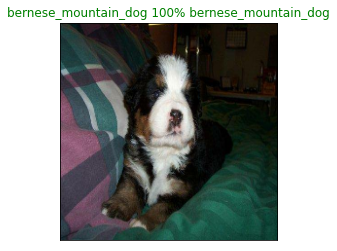

In [47]:
# View an example prediction, original image and truth breed
plot_pred(predictions, val_images, val_breeds,n=101)

Now let build a bar plot of our model's top 10 predictions

In [48]:
# Build the plot of top 10 predictions
def plot_pred_conf(predictions, breeds, n=1):

  pred_prob, true_breed = predictions[n], breeds[n]
  # Find the top 10 prediction confidence indexes
  top_10_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_values = pred_prob[top_10_indexes]
  # Find the top 10 prediction breeds
  top_10_breeds = unique_breeds[top_10_indexes]
  
  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_breeds)),
                     top_10_values,
                     color='grey')
  
  plt.xticks(np.arange(len(top_10_breeds)),
             labels=top_10_breeds,
             rotation="vertical")
  # Change the color of Predicted Bar
  if np.isin(true_breed, top_10_breeds): # If the value of the actual breed is in the top 10 breeds then we find that bar
    # np.argmax(top_10_breeds == true_breed) --> by this part we find the index where the actual breed match with the indexes of the top 10 breeds
    top_plot[np.argmax(top_10_breeds == true_breed)].set_color("green") 
  else:
    pass

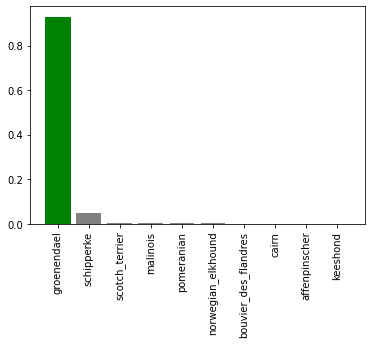

In [49]:
plot_pred_conf(predictions,
               val_breeds,
               n=77)

Now combining all the functions together lets visualize them together.

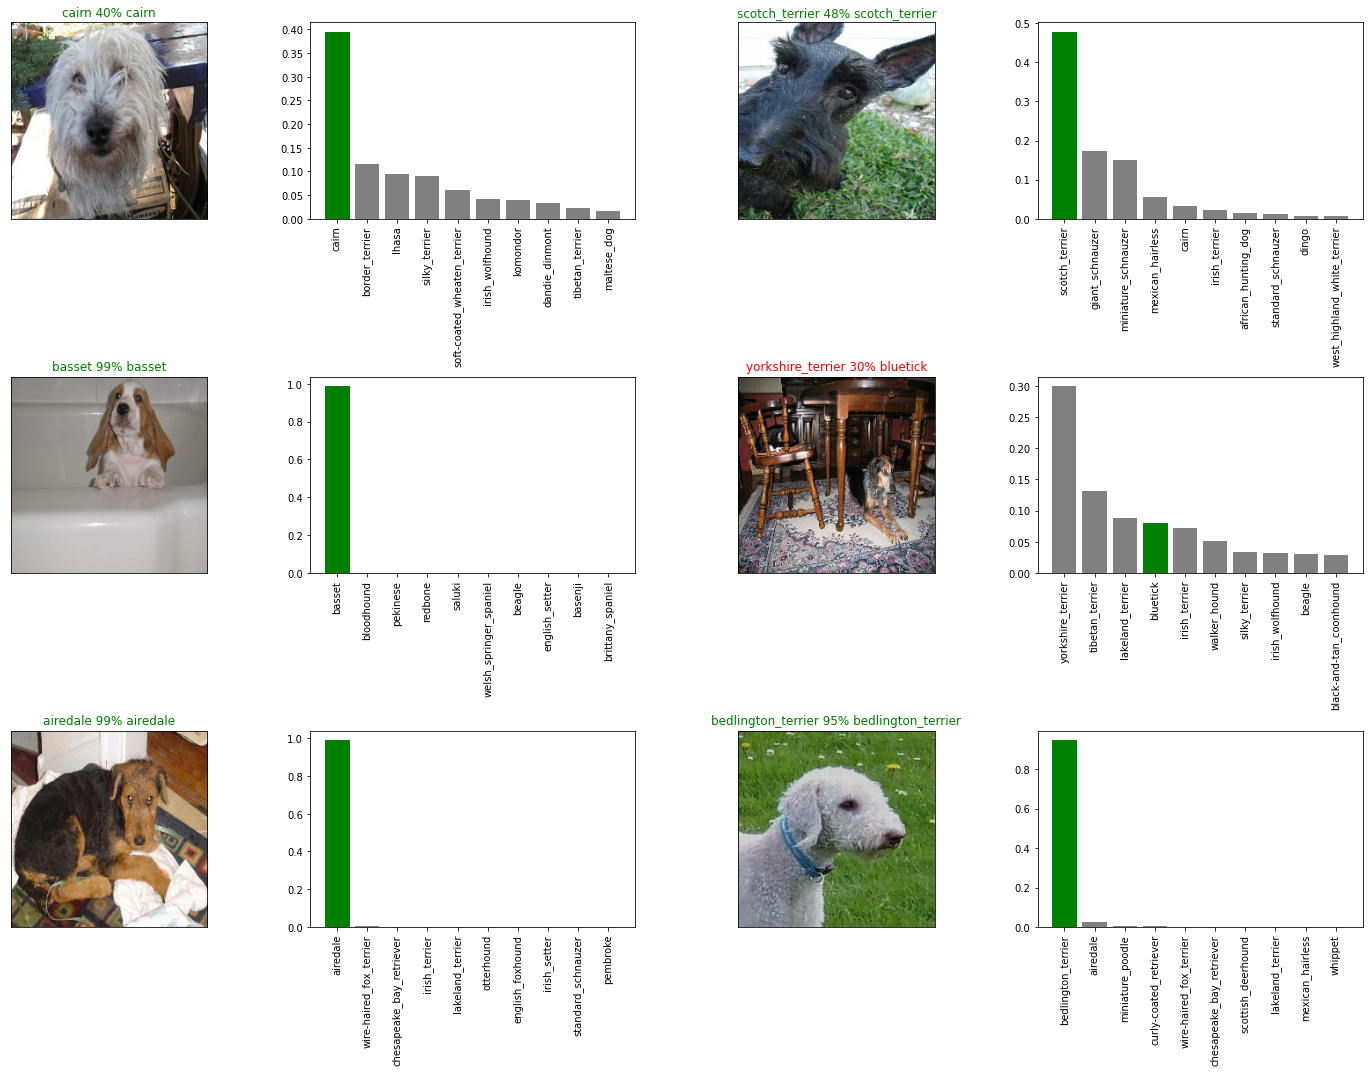

In [50]:
# Let's check a few predictions and their different values
i_multiplier = 0 # For paging or for displaying next images
num_cols = 2
num_rows = 3
num_images = num_cols*num_rows
# Setup the figure
plt.figure(figsize=(5*2*num_cols, 5*num_rows))

for i in range(num_images):
  # Create a subplot to plot Image
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  # Plot the Image with prediction
  plot_pred(predictions, val_images, val_breeds,n=i+i_multiplier)

  # Create a subplot to plot top 10 prediction graph
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # Plot the Graph with prediction
  plot_pred_conf(predictions,
               val_breeds,
               n=i+i_multiplier)
  
# To avoid overlap of plots
plt.tight_layout(h_pad=1.0)
plt.show()

### Training a model (on the full data)

Alright, so far so good now its time to train on the large data

As I was training the model so I got error between the training process so I figured out that this is due to a missing image from the kaggle the image path is available in the **labels.csv* file but image is not in the training folder so I remove them from my X, y

Error was: Image not found: Path ('/content/drive/My Drive/DogVision/Data/train/bf6cf509b2ee89fcc7f1b627ee1ed7e7.jpg')

So I try to find the index where that path occurs in X, and pop it from X,y labels

In [51]:
# Finding the index where the path occurs
index = 0
for i in X:
  if i == '/content/drive/My Drive/DogVision/Data/train/bf6cf509b2ee89fcc7f1b627ee1ed7e7.jpg':
    print(f'found at index {index}')
    break
  index += 1

found at index 7645


In [52]:
X.pop(index) # Poping the filepath
y.pop(index) # Poping the crossponding breed

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [53]:
# Splitting the X, y using train test split by the 20% validation size
X_new_train, X_new_val, y_new_train, y_new_val = train_test_split(X,y,test_size=0.2, random_state=42)

In [54]:
# size of the our new train and validation data
len(X_new_train), len(X_new_val), len(y_new_train), len(y_new_val)

(8176, 2045, 8176, 2045)

In [55]:
# Turn full training data in a data batch
full_train_data = create_data_batches(X_new_train, y_new_train)
full_val_data = create_data_batches(X_new_val, y_new_val,valid_data=True)

Creating train data batches...
Creating valid data batches...


Creating the model.

In [56]:
# Creating full model
full_model = create_model()

In [57]:
# Create the Early Stopping Callback for full model
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)

In [58]:
# Fit the full model to the full training data

# full_model.fit(x=full_train_data,
#             epochs=NUM_EPOCHS,
#             callbacks=[full_model_early_stopping],
#             validation_data=full_val_data,
#             validation_freq=1)

The above cell might take a time to train so I train it and save the model so I can save my time not training it again when open notebook again

In [59]:
# Save our full model trained on all images
# save_model(full_model, suffix="full-model-Adam")

Loading a Model.

In [60]:
# Loading a model
loaded_full_model = load_model('drive/My Drive/DogVision/Data/models/20200713-14091594649351-full-model-Adam.h5')

Loading saved model from: drive/My Drive/DogVision/Data/models/20200713-14091594649351-full-model-Adam.h5


In [61]:
# Calculating predictions
full_predictions = loaded_full_model.predict(full_val_data)

In [62]:
full_predictions

array([[1.5412409e-11, 9.9816221e-01, 3.6504264e-09, ..., 1.7258628e-07,
        2.9351769e-08, 8.7686715e-08],
       [3.3780666e-13, 3.3494032e-08, 9.3110903e-13, ..., 1.9491010e-11,
        7.2038138e-13, 4.8314402e-10],
       [6.5585082e-10, 2.2131359e-09, 6.2246369e-10, ..., 1.4146896e-09,
        5.7216301e-11, 7.6082453e-11],
       ...,
       [2.6164643e-10, 1.4873441e-12, 3.9467587e-12, ..., 1.9390274e-11,
        4.2304742e-09, 1.3449080e-09],
       [3.5571299e-12, 4.7913937e-11, 2.3995828e-11, ..., 2.3078151e-07,
        6.3339054e-09, 4.3182333e-14],
       [1.6232305e-09, 5.0633093e-07, 7.1436324e-07, ..., 3.7272939e-06,
        1.1407667e-08, 4.2066496e-08]], dtype=float32)

Unbatch the new validation data so we can visualize as early we do in 1000 Images model

In [63]:
val_new_images, val_new_breeds = unbatchify(full_val_data)

In [64]:
val_new_images[0], val_new_breeds[0]

(array([[[0.48980182, 0.3015665 , 0.14611666],
         [0.5591978 , 0.37784272, 0.23533368],
         [0.7351974 , 0.56446034, 0.42298624],
         ...,
         [0.33492708, 0.3017426 , 0.23085663],
         [0.32667002, 0.28401423, 0.19629534],
         [0.350463  , 0.31124732, 0.21320811]],
 
        [[0.502874  , 0.31463867, 0.16756438],
         [0.46196038, 0.28060532, 0.13928267],
         [0.5287225 , 0.35798547, 0.2216271 ],
         ...,
         [0.30983385, 0.27309296, 0.1961533 ],
         [0.3399892 , 0.29345253, 0.2062151 ],
         [0.38703567, 0.33997682, 0.24585918]],
 
        [[0.61021763, 0.42198235, 0.28080586],
         [0.5648951 , 0.38354006, 0.25268394],
         [0.38957286, 0.21491425, 0.09275038],
         ...,
         [0.47630614, 0.4266356 , 0.34567514],
         [0.40435374, 0.3454915 , 0.25521803],
         [0.34481132, 0.28567266, 0.19484633]],
 
        ...,
 
        [[0.2821475 , 0.26808935, 0.24962823],
         [0.33447635, 0.29478058, 0.27881

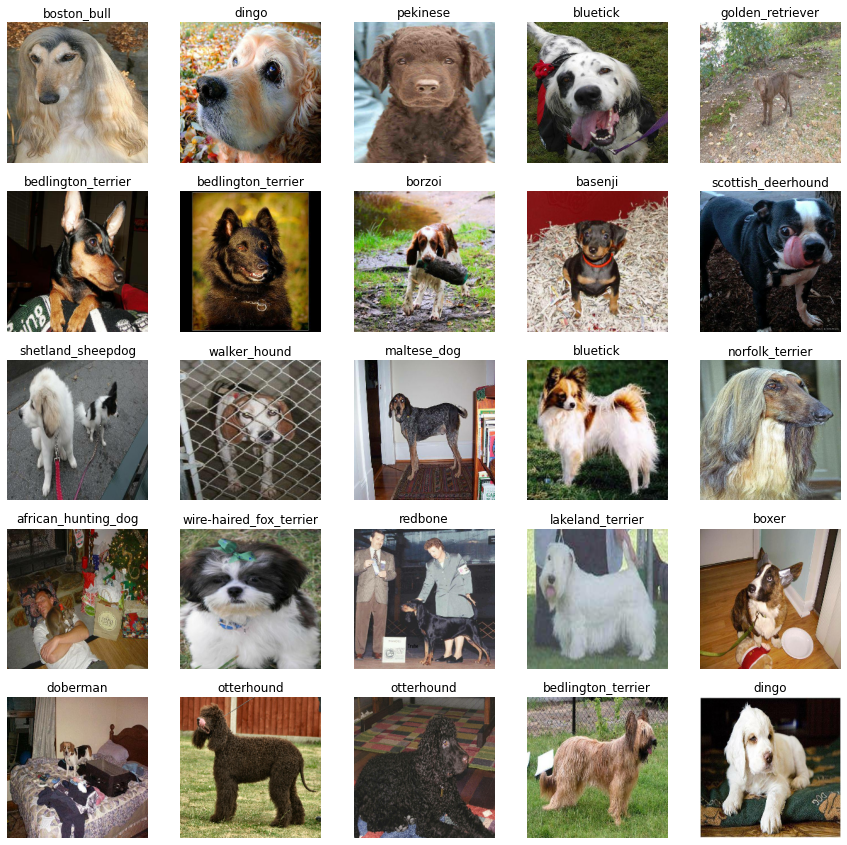

In [65]:
# Dsiplaying Images
show_25_images(val_new_images,val_new_breeds)

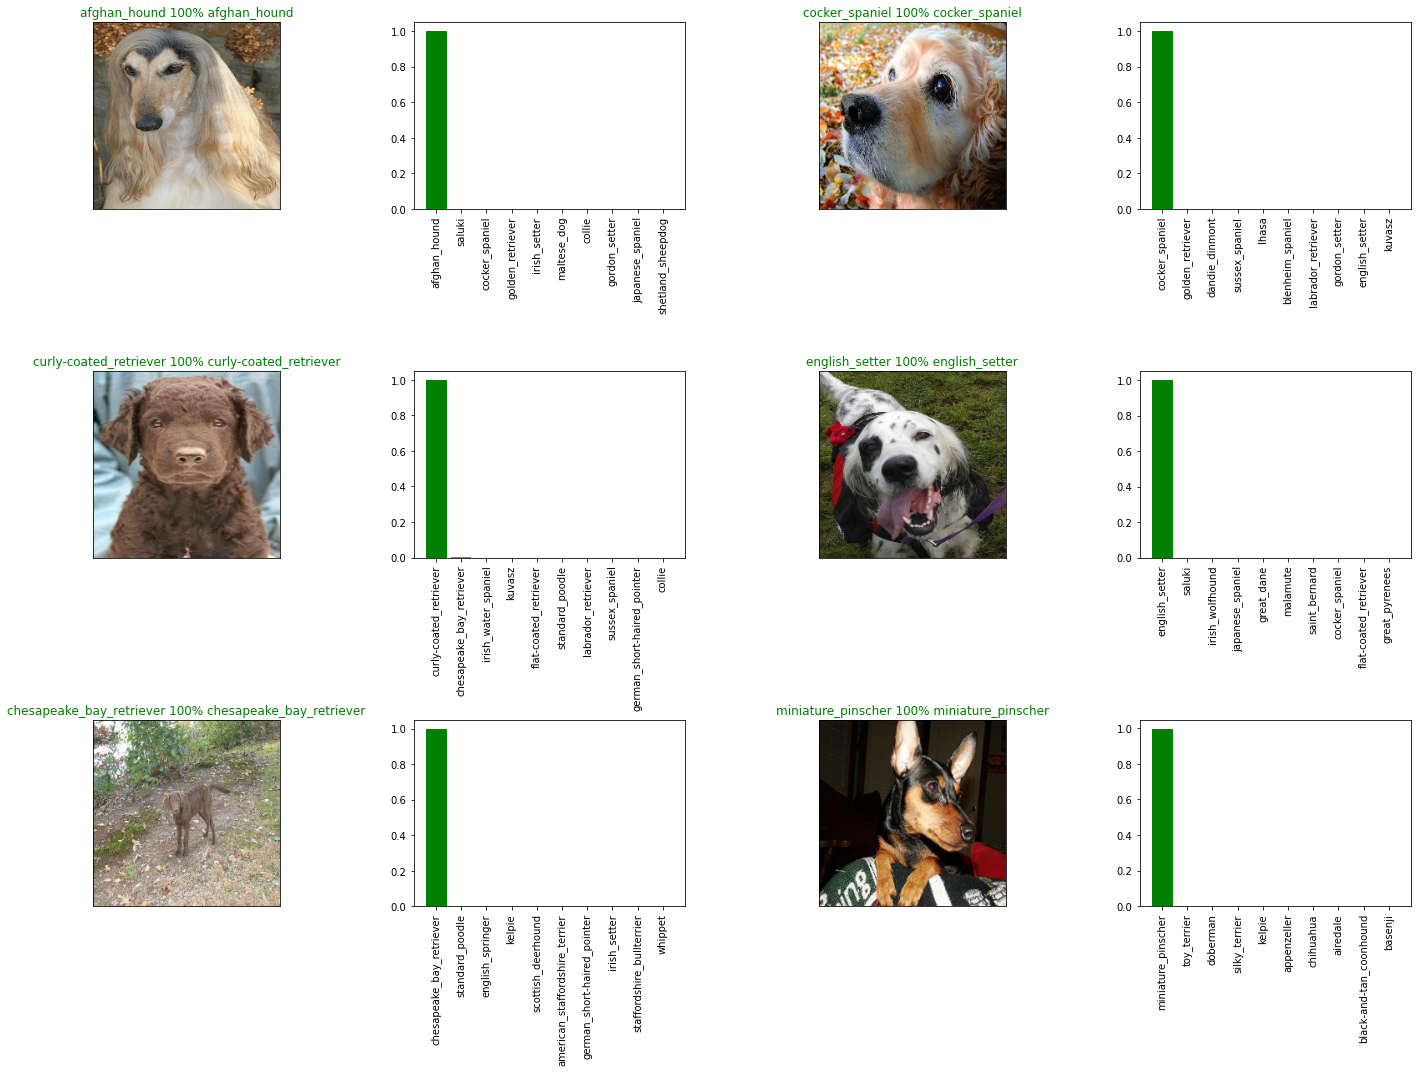

In [66]:
# Let's check a few predictions and their different values
i_multiplier = 0 # For paging or for displaying next images
num_cols = 2
num_rows = 3
num_images = num_cols*num_rows
# Setup the figure
plt.figure(figsize=(5*2*num_cols, 5*num_rows))

for i in range(num_images):
  # Create a subplot to plot Image
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  # Plot the Image with prediction
  plot_pred(full_predictions, val_new_images, val_new_breeds,n=i+i_multiplier)

  # Create a subplot to plot top 10 prediction graph
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # Plot the Graph with prediction
  plot_pred_conf(full_predictions,
               val_new_breeds,
               n=i+i_multiplier)
  
# To avoid overlap of plots
plt.tight_layout(h_pad=1.0)
plt.show()

### Making predictions on custom images

In [68]:
# Making predictions on custom images
custom_path = '/content/drive/My Drive/DogVision/dogs/'
custom_images_path = [custom_path + filename for filename in os.listdir(custom_path)]

In [72]:
# Turn custom image into batch (set to test data because there are no y labels(breeds))
custom_data = create_data_batches(custom_images_path, test_data=True)

Creating test data batches...


In [73]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

Now we've got some predictions arrays, let's convert them to labels and compare them with each image.

In [74]:
# Get custom image prediction breeds
custom_pred_breeds = [get_predicted_breed(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_breeds

['labrador_retriever', 'golden_retriever', 'dingo']

In [75]:
# Get custom images (our unbatchify() function won't work since there aren't y labels(breeds))
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

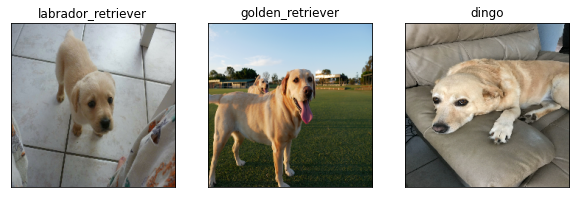

In [76]:
# Check custom image predictions
# Setup figure
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  # Create Subplot of 1 row and 3 columns since we have 3 Images
  plt.subplot(1, 3, i+1)
  # Remove ticks
  plt.xticks([])
  plt.yticks([])
  # Set Tiltle of each plot with predicted breeds
  plt.title(custom_pred_breeds[i])
  plt.imshow(image)